In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from engaged.core import AzurePipeline as AP
import engaged.core.basic as B

In [10]:
def simple_spectogram(df, meta):
    import numpy as np
    import pandas as pd
    from matplotlib.mlab import specgram
    
    
    def merge_two_dicts(x, y):
        z = x.copy()
        z.update(y)
        return z
    
    # extract numpy array from pandas.DataFrame
    data = np.asarray(df)
    
    spectrum, freqs, t = specgram(data.squeeze())    
    
    # Return value must be of a sequence of pandas.DataFrame
    df = pd.DataFrame(spectrum)
    

    # updata meta
    new_meta = {'spectogram_out': {'frequencies': freqs.tolist(),
                                   'time_points': t.tolist()}}
    
    d = merge_two_dicts(meta.to_dict(), new_meta)
    meta = pd.DataFrame(d)   
    
    return df, meta

In [11]:
meta = {'read_wav': {'in_filename': '../../../engaged_data/features/night.wav'},
        'save': {'out_filename': 'night.csv'}}

ap = AP.AzurePipeline(meta)

ap.apply(B.read_wav)
ap.apply(simple_spectogram)

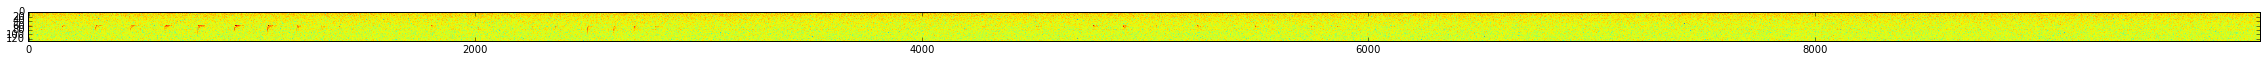

In [15]:
figure(figsize(40,40))
imshow(np.log(np.asarray(ap.df)))